# Single Qubit Quantum Operations 

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 3

In [ ]:
# Useful additional packages 
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, visualize_transition

backend_unitary = BasicAer.get_backend('unitary_simulator')
backend_qasm = BasicAer.get_backend('qasm_simulator')
backend_statevector = BasicAer.get_backend('statevector_simulator')

## Single Qubit Quantum states <a name="single_states"/>

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note, due to the conservation of probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ we only require two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this, it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}
$$

This is the most general form of a single qubit unitary.

## Single-Qubit Gates <a name="single_gates"/>

The single-qubit gates available are:
- U gate
- P gate
- Identity gate
- Pauli gates
- Clifford gates
- $C3$ gates
- Standard rotation gates 

We have provided a backend: `unitary_simulator` to allow you to calculate the unitary matrices. 

In [ ]:
q = QuantumRegister(1)

In [ ]:
qc=QuantumCircuit(q)
qc.x(q)
visualize_transition(qc)

Output hidden; open in https://colab.research.google.com to view.

### U gate

In Qiskit we give you access to the general unitary using the $u$ gate, which has the following matrix form

$$
U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}
$$


In [ ]:
qc = QuantumCircuit(q)
qc.u(pi/2,pi/4,pi/8,q)
qc.draw()

┌────────────────┐
q0: ┤ U(π/2,π/4,π/8) ├
    └────────────────┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.653-0.271j],
       [ 0.5  +0.5j  ,  0.271+0.653j]])

In [ ]:
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.u(pi/2,pi/4,pi/8,0)
qc.measure(q,c)
qc.draw()

┌────────────────┐┌─┐
  q0: ┤ U(π/2,π/4,π/8) ├┤M├
      └────────────────┘└╥┘
c0: 1/═══════════════════╩═
                         0

{'1': 504, '0': 520}


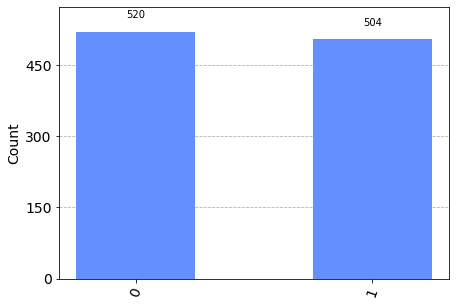

In [ ]:
job = backend_qasm.run(transpile(qc, backend_qasm))
counts=job.result().get_counts()
print(counts)
plot_histogram(counts)

[0.        +0.j         0.70710678+0.70710678j]


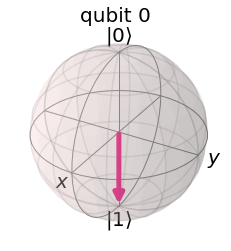

In [ ]:
job = backend_statevector.run(transpile(qc, backend_statevector))
sv=job.result().get_statevector()
print(sv)
plot_bloch_multivector(sv)

<div class="alert alert-info">
Note on U gate deprecation

The QuantumCircuit methods $u1$, $u2$ and $u3$ are now deprecated. Instead, the following replacements should be used.

- $u1(\lambda) = p(\lambda) = u(0, 0, \lambda)$

- $u2(\phi, \lambda) = u(\frac{\pi}{2}, \phi, \lambda) = p(\frac{\pi}{2} + \phi) \cdot sx \cdot p(\frac{\pi}{2} - \lambda)$

- $u3(\theta, \phi, \lambda) = u(\theta, \phi, \lambda) = p(\phi + \pi) \cdot sx \cdot p(\theta + \pi) \cdot sx \cdot p(\lambda)$

```python
# qc.u1(lambda) is now:
qc.p(lambda)

# qc.u2(phi, lambda) is now:
qc.u(pi/2, phi, lambda)

# qc.u3(theta, phi, lambda) is now:
qc.u(theta, phi, lambda)
```
</div>

### P gate

The $p(\lambda)= u(0, 0, \lambda)$ gate has the matrix form

$$
p(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is useful as it allows us to apply a quantum phase.

In [ ]:
qc = QuantumCircuit(q)
qc.p(pi/2,q)
qc.draw()

┌────────┐
q0: ┤ P(π/2) ├
    └────────┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

## Do the StateVector and Counts Visualization by students for each opeartion

### Identity gate

The identity gate is $Id = p(0)$.

In [ ]:
qc = QuantumCircuit(q)
qc.id(q)
qc.draw()

┌───┐
q0: ┤ I ├
    └───┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u(\pi,0,\pi)
$$

In [ ]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw()

┌───┐
q0: ┤ X ├
    └───┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u(\pi,\pi/2,\pi/2)
$$

In [ ]:
qc = QuantumCircuit(q)
qc.y(q)
qc.draw()

┌───┐
q0: ┤ Y ├
    └───┘

In [ ]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

#### $Z$: phase-flip gate

The phase-flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=p(\pi)
$$

In [ ]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw()

┌───┐
q0: ┤ Z ├
    └───┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

### Clifford gates

#### Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u(\pi/2,0,\pi)
$$

In [18]:
qc = QuantumCircuit(q)
qc.h(q)
qc.draw()

┌───┐
q0: ┤ H ├
    └───┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

#### $S$ (or, $\sqrt{Z}$ phase) gate

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= p(\pi/2)
$$

In [ ]:
qc = QuantumCircuit(q)
qc.s(q)
qc.z(q)
qc.z(q)
visualize_transition(qc)
#qc.draw()

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

#### $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= p(-\pi/2)
$$


In [ ]:
qc = QuantumCircuit(q)
qc.sdg(q)
qc.draw()

┌─────┐
q0: ┤ Sdg ├
    └─────┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

### $C3$ gates
#### $T$ (or, $\sqrt{S}$ phase) gate

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= p(\pi/4) 
$$

In [ ]:
qc = QuantumCircuit(q)
qc.t(q)
qc.draw()

┌───┐
q0: ┤ T ├
    └───┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

#### $T^{\dagger}$ (or, conjugate of $\sqrt{S}$ phase) gate

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= p(-\pi/4)
$$

In [ ]:
qc = QuantumCircuit(q)
qc.tdg(q)
qc.draw()

┌─────┐
q0: ┤ Tdg ├
    └─────┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u(\theta, -\pi/2,\pi/2)
$$

In [ ]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw()

┌─────────┐
q0: ┤ Rx(π/2) ├
    └─────────┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

#### Rotation around Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u(\theta,0,0)
$$

In [ ]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw()

┌─────────┐
q0: ┤ Ry(π/2) ├
    └─────────┘

In [ ]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv p(\phi)
$$

Note that here we have used an equivalent as it is different to $p$ by a global phase $e^{-i \phi/2}$.

In [ ]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw()

┌─────────┐
q0: ┤ Rz(π/2) ├
    └─────────┘

In [ ]:
job = backend_unitary.run(transpile(qc, backend_unitary))
job.result().get_unitary(qc, decimals=3)

array([[0.707-0.707j, 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

Note this is different due only to a global phase.

### Reset
It is also possible to `reset` qubits to the $\left|0\right\rangle$ state in the middle of computation. Note that `reset` is not a Gate operation, since it is irreversible.

In [ ]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)
qc.draw()

┌─┐
  q0: ─|0>─┤M├
           └╥┘
c1: 1/══════╩═
            0

In [ ]:
job = backend_qasm.run(transpile(qc, backend_qasm))
job.result().get_counts(qc)

{'0': 1024}

In [ ]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)
qc.draw()

┌───┐     ┌─┐
  q0: ┤ H ├─|0>─┤M├
      └───┘     └╥┘
c1: 1/═══════════╩═
                 0

In [ ]:
job = backend_qasm.run(transpile(qc, backend_qasm))
job.result().get_counts(qc)

{'0': 1024}

Here we see that for both of these circuits the simulator always predicts that the output is 100 percent in the 0 state.

### Conditional operations
It is also possible to do operations conditioned on the state of the classical register

In [ ]:
qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw()

┌───┐ ┌─┐
  q0: ─┤ X ├─┤M├
       └─╥─┘ └╥┘
      ┌──╨──┐ ║ 
c1: 1/╡ 0x0 ╞═╩═
      └─────┘ 0

Here the classical bit always takes the value 0 so the qubit state is always flipped. 

In [ ]:
job = backend_qasm.run(transpile(qc, backend_qasm))
job.result().get_counts(qc)

{'1': 1024}

In [ ]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw()

┌───┐┌─┐ ┌───┐ ┌─┐
  q0: ┤ H ├┤M├─┤ X ├─┤M├
      └───┘└╥┘ └─╥─┘ └╥┘
            ║ ┌──╨──┐ ║ 
c1: 1/══════╩═╡ 0x0 ╞═╩═
            0 └─────┘ 0

In [ ]:
job = backend_qasm.run(transpile(qc, backend_qasm))
job.result().get_counts(qc)

{'1': 1024}

Here the classical bit by the first measurement is random but the conditional operation results in the qubit being deterministically put into $\left|1\right\rangle$.

In [ ]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
qc_state 

array([1.52655666e-16+2.50000000e-01j, 3.53553391e-01+5.55111512e-17j,
       2.50000000e-01+2.50000000e-01j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 3.53553391e-01+7.07106781e-01j,
       2.50000000e-01-9.02056208e-17j, 0.00000000e+00+0.00000000e+00j])